In [2]:
#Importing libraries

from tensorflow.keras.layers import Input,Dense,Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob


In [4]:
#As we are using VGG16 architecture, it expects the size of 224 by 224. We will set image size

image_size = [224, 224]

In [5]:
vgg = VGG16(input_shape = image_size + [3], weights = 'imagenet', include_top =  False)


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
#Some of the layers of VGG16 are already trained. So make it False.


for layer in vgg.layers:
    layer.trainable = False

In [7]:
#use glob to find the file paths

folders = glob('/content/drive/MyDrive/Colab Notebooks/New Plant Diseases Dataset(Augmented)/train/*')

In [8]:
folders

['/content/drive/MyDrive/Colab Notebooks/New Plant Diseases Dataset(Augmented)/train/Tomato___Bacterial_spot',
 '/content/drive/MyDrive/Colab Notebooks/New Plant Diseases Dataset(Augmented)/train/Tomato___Leaf_Mold',
 '/content/drive/MyDrive/Colab Notebooks/New Plant Diseases Dataset(Augmented)/train/Tomato___Septoria_leaf_spot',
 '/content/drive/MyDrive/Colab Notebooks/New Plant Diseases Dataset(Augmented)/train/Tomato___Tomato_mosaic_virus',
 '/content/drive/MyDrive/Colab Notebooks/New Plant Diseases Dataset(Augmented)/train/Tomato___Spider_mites Two-spotted_spider_mite',
 '/content/drive/MyDrive/Colab Notebooks/New Plant Diseases Dataset(Augmented)/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 '/content/drive/MyDrive/Colab Notebooks/New Plant Diseases Dataset(Augmented)/train/Tomato___Target_Spot',
 '/content/drive/MyDrive/Colab Notebooks/New Plant Diseases Dataset(Augmented)/train/Tomato___Late_blight',
 '/content/drive/MyDrive/Colab Notebooks/New Plant Diseases Dataset(Augmented

In [9]:
#Flattening the output layer

x = Flatten()(vgg.output)


In [10]:
prediction = Dense(len(folders), activation = 'softmax')(x)


In [11]:
model = Model(inputs = vgg.input, outputs = prediction)

In [12]:
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │         250,890 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 14,965,578 (57.09 MB)

 Trainable params: 250,890 (980.04 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [13]:
#Compiling the model

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])


In [14]:
#Generating more images

train_data_gen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)


In [17]:
test_data_gen = ImageDataGenerator(rescale = 1./255)


In [20]:
#Training Data

train_set = train_data_gen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/New Plant Diseases Dataset(Augmented)/train', target_size = (224,224), batch_size = 32, class_mode = 'categorical')

Found 18356 images belonging to 10 classes.


In [21]:
#Testing Data

test_set = test_data_gen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/New Plant Diseases Dataset(Augmented)/valid', target_size = (224,224), batch_size = 32, class_mode = 'categorical')


Found 4585 images belonging to 10 classes.


Text(0.5, 1.0, 'Septoria_leaf_spot')

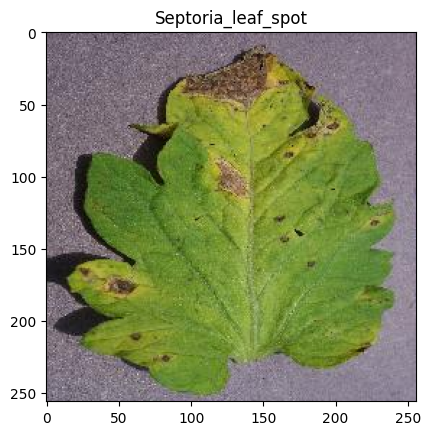

In [22]:
#Plotting some images

plt.imshow(plt.imread("/content/drive/MyDrive/Colab Notebooks/New Plant Diseases Dataset(Augmented)/train/Tomato___Septoria_leaf_spot/0025c401-7785-49c5-8bef-780a8a0d3652___Matt.S_CG 2694.JPG"))
plt.title("Septoria_leaf_spot")

Text(0.5, 1.0, 'Tomato_mosaic_virus')

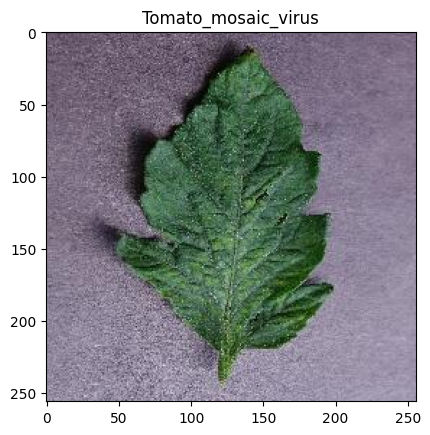

In [23]:
plt.imshow(plt.imread("/content/drive/MyDrive/Colab Notebooks/New Plant Diseases Dataset(Augmented)/train/Tomato___Tomato_mosaic_virus/006e354b-c054-4b72-a83c-e3feb038942e___PSU_CG 2330.JPG"))
plt.title("Tomato_mosaic_virus")

In [ ]:
# Fit the model

mod= model.fit(train_set,validation_data=test_set,epochs=20,steps_per_epoch=len(train_set),validation_steps=len(test_set))

In [ ]:
#Plot training and validation accuracy

plt.plot(mod.history['accuracy'], label='train accuracy')
plt.plot(mod.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

In [ ]:
#Plot training and validation loss
plt.plot(mod.history['loss'], label='train loss')
plt.plot(mod.history['val_loss'], label='val loss')
plt.legend()
plt.show()